**Autor:** George Estrella  
**Fecha:** Noviembre 8, 2024  
**Tópico:** Medidas de Riesgo

# Analisis e Implementacion de Maximo Drawdown

Es una medida de riesgo que representa la reduccion maxima en el valor de un portafolio desde un pico (maximo valor) hasta un valle (minimo valor) en un periodo de tiempo determinado. 

Se usa para evaluar la perdida potencial que un inversor puede experimentar en un portafolio, siendo especialmente relevante en el contexto de estrategias de inversión o fondos de cobertura, donde se busca comprender las caidas que el portafolio puede sufrir en condiciones adversas del mercado.

### Importancia

1. **Evaluación del Riesgo:** Ayuda a los inversores a identificar el nivel de riesgo real y el potencial de perdida maxima, lo que es crucial en la toma de decisiones de inversion.  
2. **Gestión de la Estrategia:** Muestra la capacidad de una estrategia para recuperarse despues de una perdida significativa. Un portafolio que tarda mucho en recuperarse puede considerarse más riesgoso.  
3. **Comparación de Inversiones:** Permite comparar estrategias o activos en terminos de su peor perdida experimentada, mas alla de la volatilidad o la desviacion estandar.

### Formula
Calculo del Drawdown $(DD_t)$ en el periodo $t$
$$
\text{Drawdown}(t) = \frac{P(t) - \max_{s \leq t} P(s)}{\max_{s \leq t} P(s)}
$$
Donde:  
$P_{t}:$ es el valor del portafolio en el tiempo.  
$\max_{s \leq t} P(s):$ Representa el valor máximo del portafolio hasta el tiempo $t$.
$$
\text{MDD} = \min_t \left( \text{Drawdown}(t) \right)
$$

### Analisis Quantitativo

In [2]:
# Libreria
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
# Tabla S&P 500
SP500 = yf.download("^GSPC", start="2019-01-01", end="2024-10-01")["Close"].reset_index()

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Visualizacion de datos
SP500["Date"] = pd.to_datetime(SP500["Date"])
SP500.head(10)

,Date,Close
0,2019-01-02,2510.030029
1,2019-01-03,2447.889893
2,2019-01-04,2531.939941
3,2019-01-07,2549.689941
4,2019-01-08,2574.409912
5,2019-01-09,2584.959961
6,2019-01-10,2596.639893
7,2019-01-11,2596.260010
8,2019-01-14,2582.610107
9,2019-01-15,2610.300049


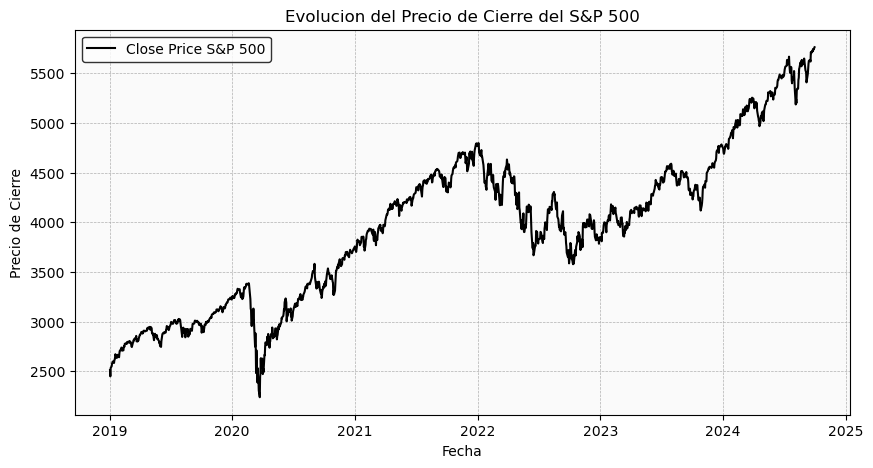

In [5]:
# Visualizacion de Precio de Cierre
plt.figure(figsize=(10,5))
plt.gca().set_facecolor("#fafafa")
plt.plot(SP500["Date"], SP500["Close"], label="Close Price S&P 500", color="black")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.title("Evolucion del Precio de Cierre del S&P 500")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

In [6]:
# Peaks
SP500["Peaks"] = {}
for i in SP500.index:
    if i == 0:
        SP500.loc[i, "Peaks"] = SP500.loc[i, "Close"]
    else:
        SP500.loc[i, "Peaks"] = (SP500.loc[0:i, "Close"]).max()

In [7]:
SP500.head(10)

,Date,Close,Peaks
0,2019-01-02,2510.030029,2510.030029
1,2019-01-03,2447.889893,2510.030029
2,2019-01-04,2531.939941,2531.939941
3,2019-01-07,2549.689941,2549.689941
4,2019-01-08,2574.409912,2574.409912
5,2019-01-09,2584.959961,2584.959961
6,2019-01-10,2596.639893,2596.639893
7,2019-01-11,2596.260010,2596.639893
8,2019-01-14,2582.610107,2596.639893
9,2019-01-15,2610.300049,2610.300049


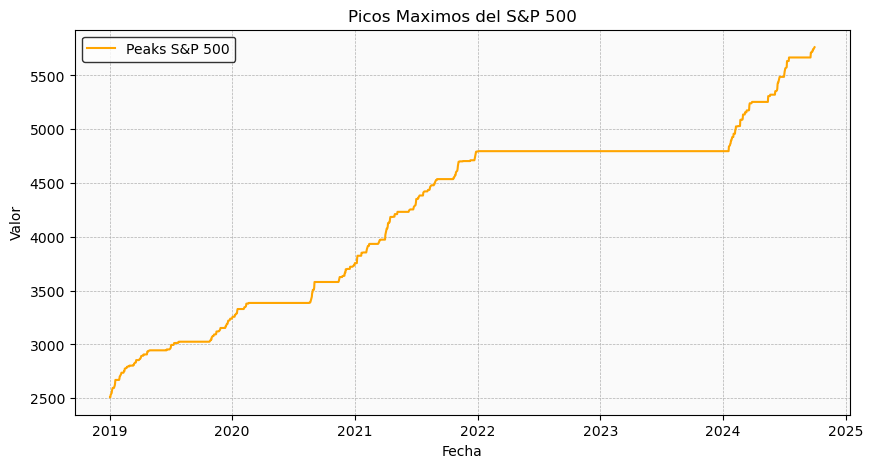

In [8]:
# Visualizacion de Picos Maximos del S$P 500
plt.figure(figsize=(10,5))
plt.gca().set_facecolor("#fafafa")
plt.plot(SP500["Date"], SP500["Peaks"], label="Peaks S&P 500", color="orange", linewidth=1.5)
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Picos Maximos del S&P 500")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

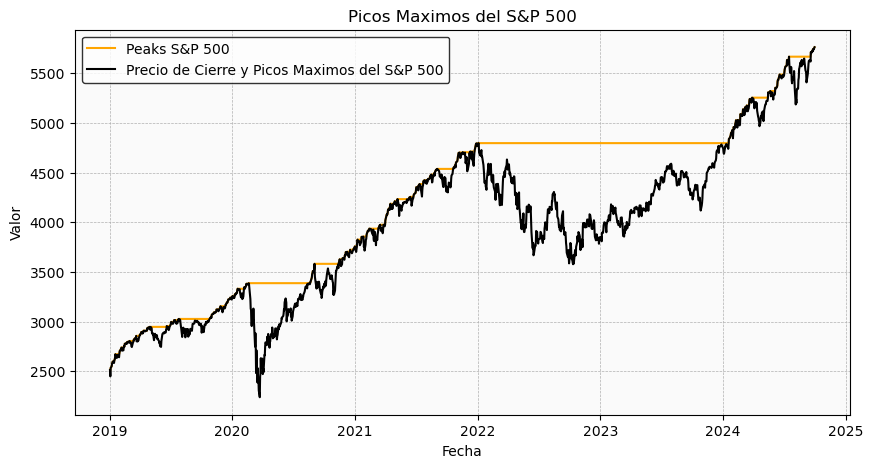

In [9]:
# Visualizacion de Precio de Cierre y Picos Maximos del S&P500
plt.figure(figsize=(10,5))
plt.gca().set_facecolor("#fafafa")
plt.plot(SP500["Date"], SP500["Peaks"], label="Peaks S&P 500", color='orange', linewidth=1.5)
plt.plot(SP500["Date"], SP500["Close"], label="Precio de Cierre y Picos Maximos del S&P 500", color="black")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Picos Maximos del S&P 500")
plt.legend(frameon=True, facecolor='white', edgecolor='black')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [10]:
# Calculo del Drawdown
SP500["DD"] = (SP500["Close"]-SP500["Peaks"])/SP500["Peaks"]

In [11]:
# Visualizacion de Datos
SP500.head(10)

,Date,Close,Peaks,DD
0,2019-01-02,2510.030029,2510.030029,0.0
1,2019-01-03,2447.889893,2510.030029,-0.024757
2,2019-01-04,2531.939941,2531.939941,0.0
3,2019-01-07,2549.689941,2549.689941,0.0
4,2019-01-08,2574.409912,2574.409912,0.0
5,2019-01-09,2584.959961,2584.959961,0.0
6,2019-01-10,2596.639893,2596.639893,0.0
7,2019-01-11,2596.260010,2596.639893,-0.000146
8,2019-01-14,2582.610107,2596.639893,-0.005403
9,2019-01-15,2610.300049,2610.300049,0.0


In [12]:
# Formato
SP500['Date'] = pd.to_datetime(SP500['Date'], errors='coerce')
SP500['Close'] = pd.to_numeric(SP500['Close'], errors='coerce')
SP500['Peaks'] = pd.to_numeric(SP500['Peaks'], errors='coerce')

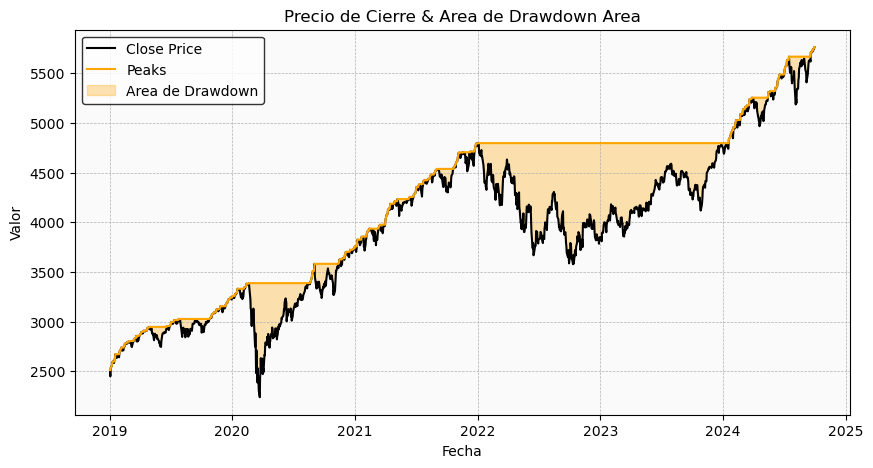

In [13]:
# Visualizacion de Drawdown (DD)
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor("#fafafa")
plt.plot(SP500["Date"], SP500["Close"], color="black", label="Close Price")
plt.plot(SP500["Date"], SP500["Peaks"], color="orange", linewidth=1.5, label="Peaks")
plt.fill_between(SP500["Date"], SP500["Close"], SP500["Peaks"], where=(SP500["Close"] < SP500["Peaks"]), color="orange", alpha=0.3,label="Area de Drawdown")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Precio de Cierre & Area de Drawdown Area")
plt.legend(frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

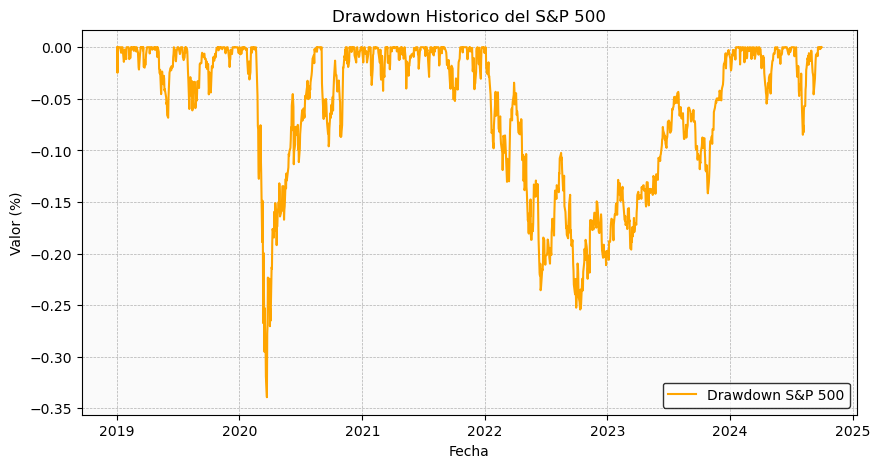

In [14]:
# Visualizacion del Drawdown del S&P500
plt.figure(figsize=(10,5))
plt.gca().set_facecolor("#fafafa")
plt.plot(SP500["Date"], SP500["DD"], label="Drawdown S&P 500", color='orange', linewidth=1.5)
plt.xlabel("Fecha")
plt.ylabel("Valor (%)")
plt.title("Drawdown Historico del S&P 500")
plt.legend(frameon=True, facecolor='white', edgecolor='black')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [15]:
# Maximo Drawdown
print("Maximo Drawdown:", round(SP500["DD"].min()*100, 2),"%")

Maximo Drawdown: -33.92 %


In [18]:
# Max Drawdown por Mes
SP500['Date'] = pd.to_datetime(SP500['Date'])
SP500['Year'] = SP500['Date'].dt.year
SP500['Month'] = SP500['Date'].dt.month
Month_DD = SP500.groupby(['Year', 'Month'])['DD'].min().reset_index()
Month_DD = Month_DD.rename(columns={'DD': 'Max_Drawdown'})
Month_DD["Max_Drawdown"] = Month_DD["Max_Drawdown"]*100

In [19]:
Month_DD[Month_DD["Year"] == 2020]

,Year,Month,Max_Drawdown
12,2020,1,-3.126486
13,2020,2,-12.755783
14,2020,3,-33.92496
15,2020,4,-27.041033
16,2020,5,-16.719576
17,2020,6,-11.341784
18,2020,7,-7.982216
19,2020,8,-2.703359
20,2020,9,-9.604455
21,2020,10,-8.681765


**Actividad:** Periodo de Recuperacion del Instrumento

In [ ]:
# Implementacion

def max_drawdown(prices: pd.DataFrame, star_date=str, end_date=str):
    prices = prices.loc